**Building a simple classifier**<br/>

Let's see how to build a simple classifier using some training data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])
y = [0, 1, 1, 0, 0, 1, 1, 0]
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

To get an idea about our data, let's plot it, as follows:

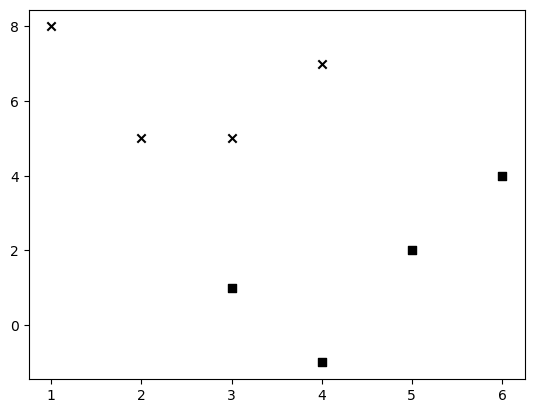

In [4]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.show()

If you were asked to inspect the datapoints visually and draw a separating line, what would you do? You would simply draw a line in between them. Let's go ahead and do this:

In [6]:
line_x = range(10)
line_y = line_x

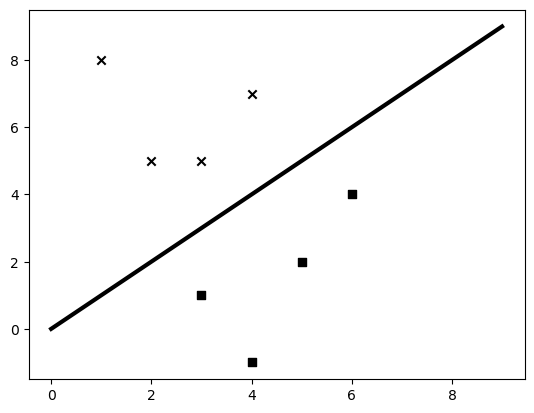

In [7]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.plot(line_x, line_y, color='black', linewidth=3)
plt.show()

We just created a line with the mathematical equation y = x. 

**Building a Naive Bayes classifier**
A Naive Bayes classifier is a supervised learning classifier that uses Bayes' theorem to build the model. In this recipe, we will build a Naive Bayes classifier.

In [2]:
from sklearn.naive_bayes import GaussianNB


Now we are going to discover how we can use data to be uploaded from files. Our file is called *data_multivar.txt* file. It contains comma-separated numerical data in each line. Let's load the data from this file:

In [3]:
input_file = 'data_multivar_NB.txt'
X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])
X = np.array(X)
y = np.array(y)
print(X)

[[ 8.730e+00  3.100e-01]
 [ 4.710e+00 -4.200e-01]
 [ 4.580e+00  6.180e+00]
 [ 9.380e+00  2.180e+00]
 [ 4.780e+00  5.280e+00]
 [ 1.220e+00  2.250e+00]
 [ 9.220e+00  1.140e+00]
 [ 5.610e+00 -3.400e-01]
 [ 7.800e+00  5.100e-01]
 [ 1.980e+00  1.690e+00]
 [ 7.510e+00  1.760e+00]
 [ 9.500e-01  2.090e+00]
 [ 3.430e+00  2.400e-01]
 [ 4.740e+00  4.700e+00]
 [ 6.400e-01  1.520e+00]
 [ 4.200e+00 -9.800e-01]
 [ 5.100e-01  2.650e+00]
 [ 3.940e+00 -1.170e+00]
 [ 7.390e+00  4.100e-01]
 [ 4.190e+00 -1.150e+00]
 [ 9.900e-01  2.970e+00]
 [ 1.620e+00  9.700e-01]
 [ 3.370e+00 -6.800e-01]
 [ 4.760e+00  4.470e+00]
 [ 3.640e+00  4.340e+00]
 [ 9.180e+00  1.080e+00]
 [ 3.900e+00 -1.300e+00]
 [ 4.000e+00 -9.100e-01]
 [ 4.640e+00  6.390e+00]
 [ 7.240e+00  1.810e+00]
 [ 7.650e+00  1.000e-01]
 [ 9.180e+00  1.800e+00]
 [ 3.700e-01  2.040e+00]
 [ 8.950e+00  3.470e+00]
 [ 3.560e+00 -1.200e-01]
 [ 3.850e+00 -1.070e+00]
 [ 2.710e+00 -2.600e-01]
 [ 3.880e+00 -1.270e+00]
 [ 3.970e+00 -6.700e-01]
 [ 2.100e+00  2.250e+00]


Let's build the Naive Bayes classifier. The gausiannb function below specifies the Gaussian Naive Bayes model.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into 70-30 train-test to evaluate real world performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier on training data to learn class distributions
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X_train, y_train)

# Test on unseen data to assess generalisation
y_pred = classifier_gaussiannb.predict(X_test)

In [ ]:
# Measure test accuracy to quantify classifier performance
accuracy = 100.0 * (y_test == y_pred).sum() / len(y_test)
print("Test Set Accuracy =", round(accuracy, 2), "%")

Test Set Accuracy = 100.0 %


Let's plot the data and the boundaries of the classes:

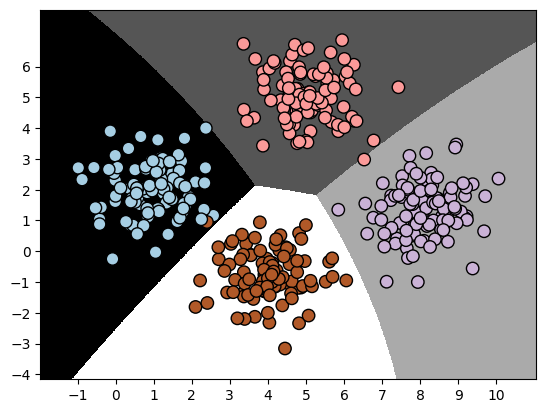

In [ ]:
x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

# Fine grained resolution for smooth decision boundary visualisation
step_size = 0.01

# Create grid covering feature space for boundary prediction
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Classify each grid point to visualise decision regions
mesh_output = classifier_gaussiannb.predict(np.c_[x_values.ravel(), y_values.ravel()])
mesh_output = mesh_output.reshape(x_values.shape)

# Create plot with decision region background
plt.figure()
plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

# Overlay actual training data for verification
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

# Frame axes to grid extent
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())

# Label axes with integer markers
plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

plt.show()